# 종합 탐색적 데이터 분석 (EDA)

## 1. 데이터 로딩 및 전처리

In [35]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')

# 시각화 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Noto Sans KR'
plt.rcParams['axes.unicode_minus'] = False

print(f'현재 폰트: {plt.rcParams["font.family"]}')

현재 폰트: ['Noto Sans KR']


In [36]:
# 데이터 로딩
products_df = pd.read_parquet('data/products_with_features.parquet')
reviews_df = pd.read_parquet('data/reviews_with_features.parquet')
promotion = pd.read_csv('data/csv/promotion.csv')

print("=" * 50)
print("데이터 로딩 완료")
print("=" * 50)
print(f"\n상품 데이터: {products_df.shape[0]:,}행 x {products_df.shape[1]}열")
print(f"리뷰 데이터: {reviews_df.shape[0]:,}행 x {reviews_df.shape[1]}열")
print(f"프로모션 데이터: {promotion.shape[0]:,}행 x {promotion.shape[1]}열")

데이터 로딩 완료

상품 데이터: 438행 x 22열
리뷰 데이터: 85,520행 x 26열
프로모션 데이터: 118행 x 4열


In [37]:
# 사용 가능한 컬럼 확인
print("\n=== Products DataFrame 컬럼 ===")
for i, col in enumerate(products_df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n=== Reviews DataFrame 컬럼 ===")
for i, col in enumerate(reviews_df.columns, 1):
    print(f"{i:2d}. {col}")


=== Products DataFrame 컬럼 ===
 1. product_code
 2. category_home
 3. category_1
 4. category_2
 5. brand
 6. name
 7. price
 8. country
 9. likes
10. shares
11. url
12. can_할랄인증
13. can_비건
14. certifications
15. review_count
16. engagement_score
17. price_tier
18. relative_price_ratio
19. price_position
20. cp_index
21. is_god_sung_bi
22. review_density

=== Reviews DataFrame 컬럼 ===
 1. product_code
 2. date
 3. user_masked
 4. user
 5. rating
 6. text
 7. image_count
 8. review_length
 9. review_length_category
10. is_reorder
11. user_total_reviews
12. user_activity_level
13. user_avg_rating_reorder
14. user_rating_tendency
15. is_brand_repurchase
16. is_category_repurchase
17. year
18. month
19. day_of_week
20. day_name
21. season
22. first_review_date
23. days_since_first_review
24. is_new_product
25. is_during_promo
26. promo_type_category


In [38]:
# 데이터 미리보기
print("\n" + "=" * 50)
print("[상품 데이터 샘플]")
print("=" * 50)
print(products_df.head())
print("\n[상품 데이터 정보]")
print(products_df.info())
print("\n[상품 데이터 기술통계]")
print(products_df.describe())


[상품 데이터 샘플]
   product_code category_home category_1 category_2    brand  \
0       1060125         뷰티/위생       메이크업     아이메이크업       머지   
1       1038070         뷰티/위생       메이크업     아이메이크업       더봄   
2       1061139         뷰티/위생       메이크업     아이메이크업  프릴루드 딘토   
3       1061145         뷰티/위생       메이크업     아이메이크업  프릴루드 딘토   
4       1059028         뷰티/위생       메이크업     아이메이크업       더봄   

                              name  price country  likes  shares  ...  \
0        머지 렛츠 픽싱 슬림 젤 아이라이너 브론즈오팔   3000      한국   4997      52  ...   
1            더봄 애교살＆트임 펜슬 (음영 브라운)   2000      한국   9999     184  ...   
2  [72 리틀 오스틴]프릴루드 딘토 노스탈지아 아이 팔레트   5000      한국   9806     109  ...   
3   [71 리틀 올콧]프릴루드 딘토 노스탈지아 아이 팔레트   5000      한국   6886      56  ...   
4             더봄 애교살＆트임 펜슬 (핑크 로지)   2000      한국   5308      61  ...   

    can_비건 certifications review_count  engagement_score      price_tier  \
0  Unknown            NaN          485           1031.90  Standard (Mid)   
1  Unknown 

In [39]:
print("\n" + "=" * 50)
print("[리뷰 데이터 샘플]")
print("=" * 50)
print(reviews_df.head())
print("\n[리뷰 데이터 정보]")
print(reviews_df.info())
print("\n[리뷰 데이터 기술통계]")
print(reviews_df.describe())


[리뷰 데이터 샘플]
   product_code       date user_masked       user  rating  \
0       1060125 2026-01-29      hyx***  user_0001       5   
1       1060125 2026-02-03     cho****  user_0002       5   
2       1060125 2026-01-12    lyu*****  user_0003       5   
3       1060125 2024-10-12   soy******  user_0004       5   
4       1060125 2026-02-02     nah****  user_0005       5   

                                                text  image_count  \
0  색은 찐한 검정이 아니라 자연스러운 블랙~브라운 사이같음 그리고 발림성이 ㄹㅇ 개부...            2   
1  슬림한데 발색 진해서 곰손들도 쉽게 쓸 수 있는 아이라이너네요! 지속력은 조금 더 ...            1   
2  키스미 펜슬만 쓰다가 머지 발림성 미쳤어요\n완전 혜자템! 다이소 너무 좋아요\n비...            1   
3  3시간 가량 지나고 물, 클렌징 다 해봤는데\n\n순서대로\n주먹쪽(붓타입)\n알리...            1   
4  머지제품이야 아이라이너로 유명한데 다이소에서 저렴한 가격으로 구매할수있어 좋네요 머...            1   

   review_length review_length_category  is_reorder  ...  year month  \
0             73                 Medium       False  ...  2026     1   
1            148                   Long       False  ...  202

### 분석 목적: 프로모션 효과 분석

**분석 목적:**
- 프로모션 기간과 비프로모션 기간의 리뷰 차이 분석
- 프로모션이 평점 및 리뷰 품질에 미치는 영향 평가
- 효과적인 프로모션 유형 식별

**기대 결과:**
- ROI 높은 프로모션 전략 도출
- 프로모션 타이밍 최적화
- 프로모션별 타겟 고객층 매칭


In [40]:
print("\n" + "=" * 50)
print("[프로모션 데이터 샘플]")
print("=" * 50)
print(promotion.head())
print("\n[프로모션 데이터 정보]")
print(promotion.info())

# 날짜 변환
promotion['date'] = pd.to_datetime(promotion['date'])


[프로모션 데이터 샘플]
         date     description brand event_type
0  2024-09-11      다이소데이뷰티풀충전    VT      리뷰이벤트
1  2024-09-11      다이소데이뷰티풀충전   CNP      리뷰이벤트
2  2024-11-13  오늘은다이소데이뷰티신상대전   메디필      구매이벤트
3  2024-11-13  오늘은다이소데이뷰티신상대전    쿤달      리뷰이벤트
4  2025-01-21  다이소데이뷰티신상집중포커스    VT      리뷰이벤트

[프로모션 데이터 정보]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         118 non-null    object
 1   description  118 non-null    object
 2   brand        118 non-null    object
 3   event_type   118 non-null    object
dtypes: object(4)
memory usage: 3.8+ KB
None


### 2.4 카테고리별 Engagement Score 비교


**분석 목적:**
- 전체 제품의 Engagement Score 분포 패턴 파악

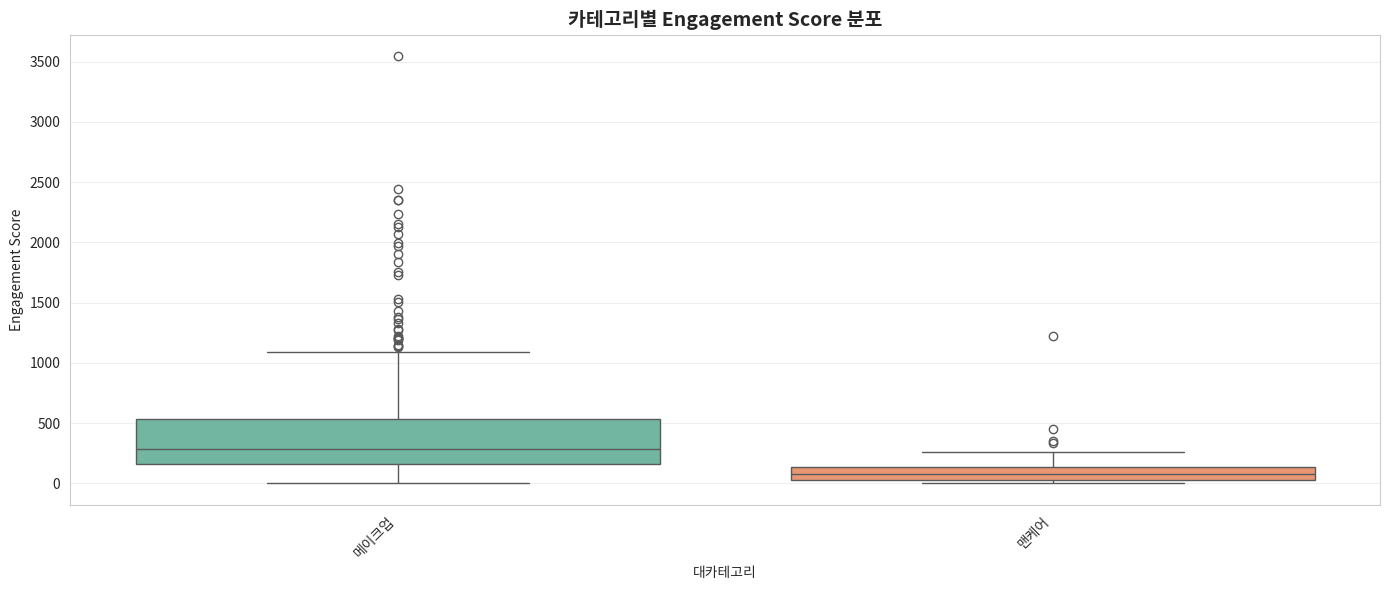


[카테고리별 Engagement Score 통계]
                  mean  median         std  count
category_1                                       
메이크업        443.742466  282.65  472.376217    365
맨케어         107.139041   76.85  158.929299     73


In [41]:
# 카테고리별 Engagement Score 박스플롯
plt.figure(figsize=(14, 6))

# 카테고리별로 정렬
category_order = products_df.groupby('category_1')['engagement_score'].median().sort_values(ascending=False).index

sns.boxplot(data=products_df, x='category_1', y='engagement_score', order=category_order, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.xlabel('대카테고리')
plt.ylabel('Engagement Score')
plt.title('카테고리별 Engagement Score 분포', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 카테고리별 통계
category_stats = products_df.groupby('category_1')['engagement_score'].agg(['mean', 'median', 'std', 'count'])
category_stats = category_stats.sort_values('median', ascending=False)

print("\n[카테고리별 Engagement Score 통계]")
print(category_stats)

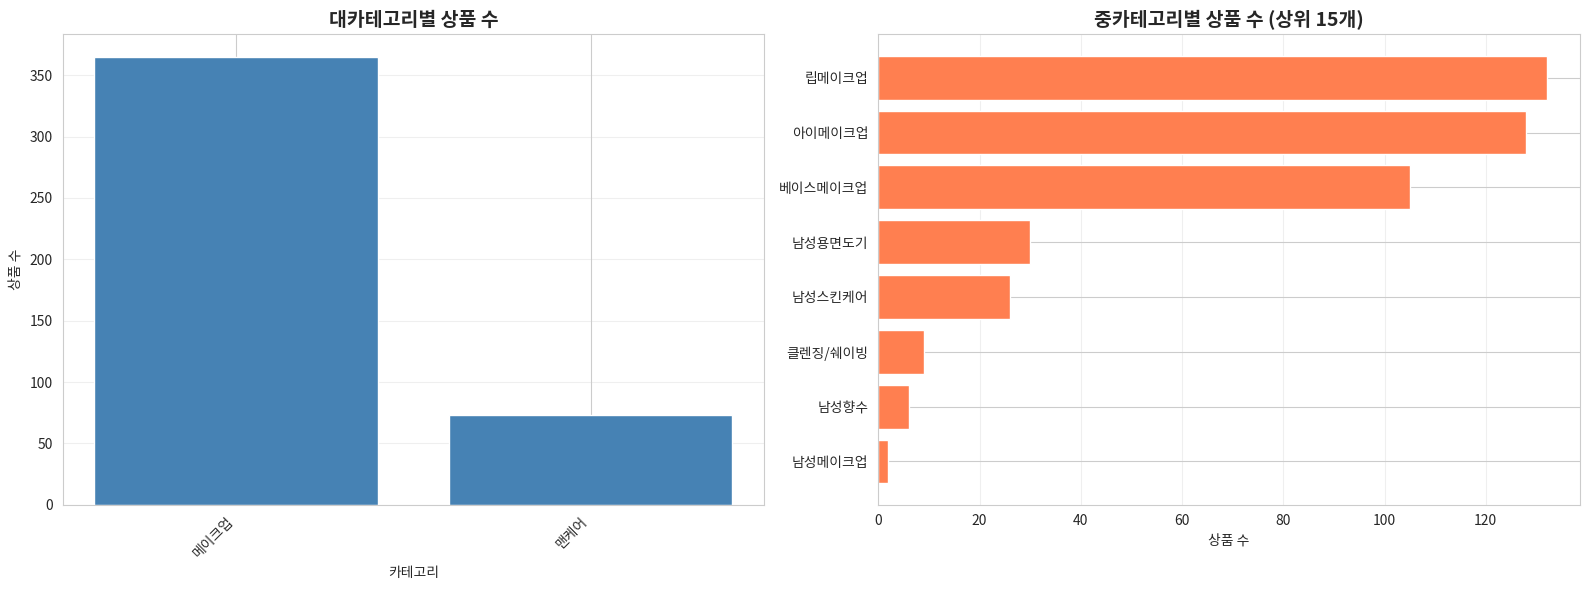


[대카테고리별 상품 수]
category_1
메이크업    365
맨케어      73
Name: count, dtype: int64

총 대카테고리 수: 2
총 중카테고리 수: 8


In [42]:
# 대카테고리별 상품 수
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 대카테고리
cat1_counts = products_df['category_1'].value_counts()
axes[0].bar(range(len(cat1_counts)), cat1_counts.values, color='steelblue')
axes[0].set_xticks(range(len(cat1_counts)))
axes[0].set_xticklabels(cat1_counts.index, rotation=45, ha='right')
axes[0].set_title('대카테고리별 상품 수', fontsize=14, fontweight='bold')
axes[0].set_xlabel('카테고리')
axes[0].set_ylabel('상품 수')
axes[0].grid(axis='y', alpha=0.3)

# 중카테고리 (상위 15개)
cat2_counts = products_df['category_2'].value_counts().head(15)
axes[1].barh(range(len(cat2_counts)), cat2_counts.values, color='coral')
axes[1].set_yticks(range(len(cat2_counts)))
axes[1].set_yticklabels(cat2_counts.index)
axes[1].set_title('중카테고리별 상품 수 (상위 15개)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('상품 수')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n[대카테고리별 상품 수]")
print(cat1_counts)
print(f"\n총 대카테고리 수: {products_df['category_1'].nunique()}")
print(f"총 중카테고리 수: {products_df['category_2'].nunique()}")

### 2.6 Engagement Score 설명 요인

**분석 목적:**
- 전체 제품의 Engagement Score 분포 패턴 파악



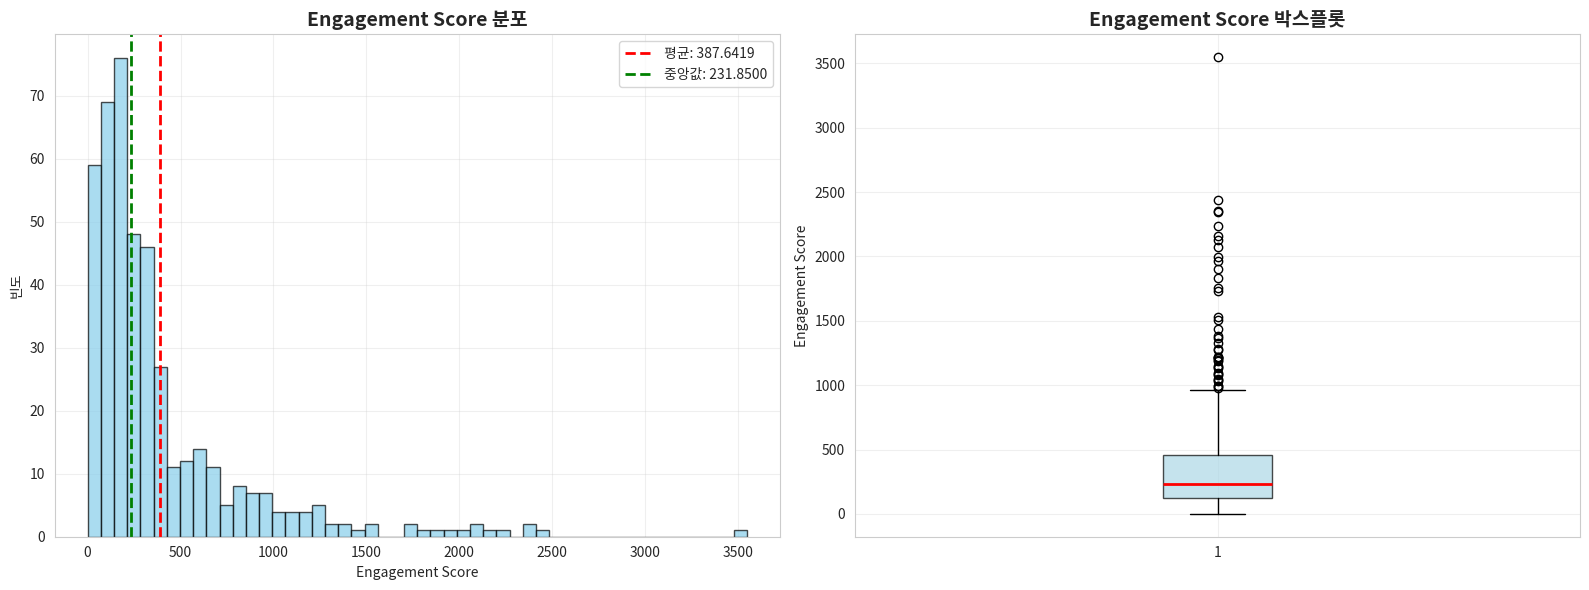


[Engagement Score 통계]
count     438.000000
mean      387.641895
std       453.649946
min         0.000000
25%       124.512500
50%       231.850000
75%       460.187500
max      3547.900000
Name: engagement_score, dtype: float64

왜도(Skewness): 2.7102
첨도(Kurtosis): 9.6810


In [43]:
# Engagement Score 분포 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(products_df['engagement_score'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(products_df['engagement_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'평균: {products_df["engagement_score"].mean():.4f}')
axes[0].axvline(products_df['engagement_score'].median(), color='green', linestyle='--', linewidth=2, label=f'중앙값: {products_df["engagement_score"].median():.4f}')
axes[0].set_title('Engagement Score 분포', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Engagement Score')
axes[0].set_ylabel('빈도')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot
axes[1].boxplot(products_df['engagement_score'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Engagement Score 박스플롯', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Engagement Score')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n[Engagement Score 통계]")
print(products_df['engagement_score'].describe())
print(f"\n왜도(Skewness): {products_df['engagement_score'].skew():.4f}")
print(f"첨도(Kurtosis): {products_df['engagement_score'].kurtosis():.4f}")

## 3. 가격 관점 분석


**분석 목적:**
- 브랜드별 평균 Engagement Score 비교


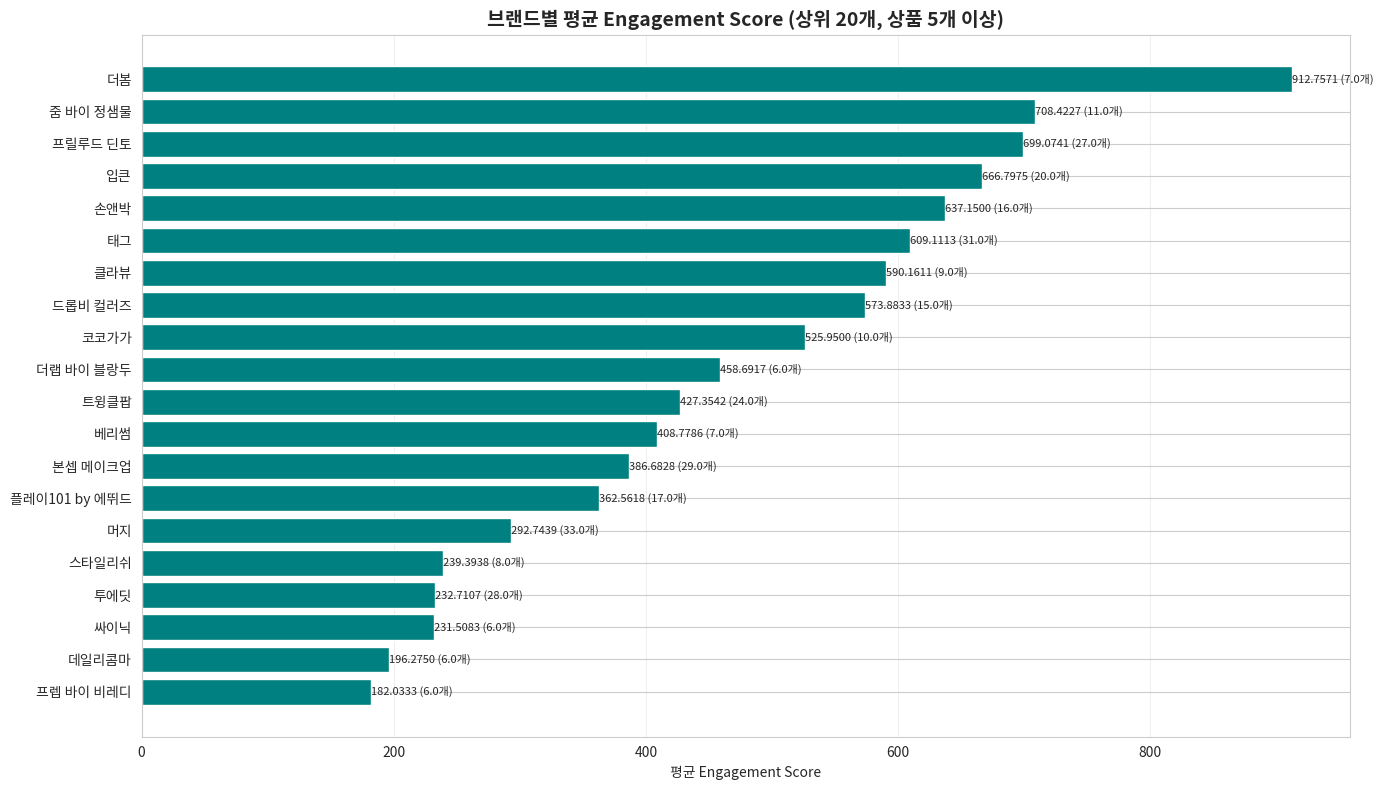


[상위 10개 브랜드]
           engagement_score  product_count
brand                                     
더봄               912.757143              7
줌 바이 정샘물         708.422727             11
프릴루드 딘토          699.074074             27
입큰               666.797500             20
손앤박              637.150000             16
태그               609.111290             31
클라뷰              590.161111              9
드롭비 컬러즈          573.883333             15
코코가가             525.950000             10
더랩 바이 블랑두        458.691667              6


In [44]:
# 브랜드별 평균 Engagement Score (상위 20개)
brand_engagement = products_df.groupby('brand').agg({
    'engagement_score': 'mean',
    'product_code': 'count'
}).rename(columns={'product_code': 'product_count'})

# 상품이 5개 이상인 브랜드만 선택
brand_engagement = brand_engagement[brand_engagement['product_count'] >= 5]
brand_engagement = brand_engagement.sort_values('engagement_score', ascending=False).head(20)

plt.figure(figsize=(14, 8))
bars = plt.barh(range(len(brand_engagement)), brand_engagement['engagement_score'].values, color='teal')
plt.yticks(range(len(brand_engagement)), brand_engagement.index)
plt.xlabel('평균 Engagement Score')
plt.title('브랜드별 평균 Engagement Score (상위 20개, 상품 5개 이상)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# 값 표시
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f} ({brand_engagement.iloc[i]["product_count"]}개)',
             ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()

print("\n[상위 10개 브랜드]")
print(brand_engagement.head(10))

**분석 목적:**
- CP Index(가성비 지표)와 Engagement Score의 관계 분석


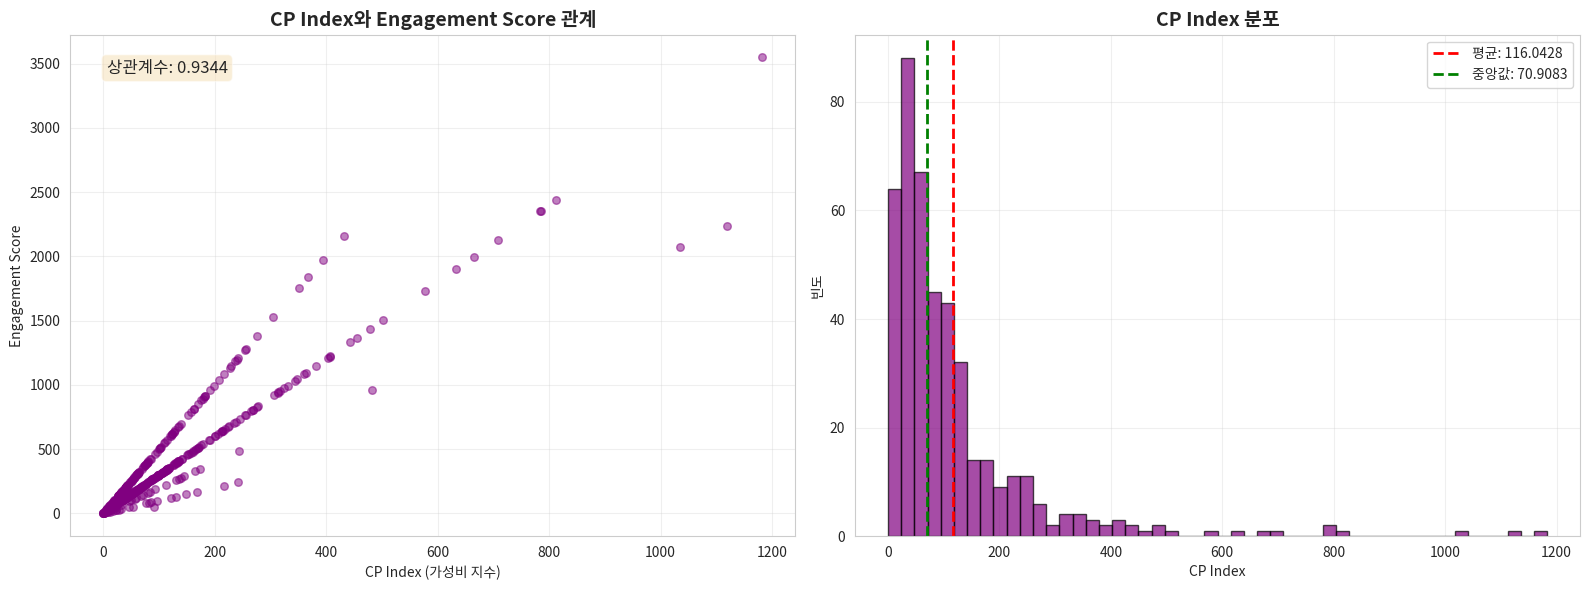


[CP Index 통계]
count     438.000000
mean      116.042793
std       146.811887
min         0.000000
25%        35.104167
50%        70.908333
75%       134.520833
max      1182.633333
Name: cp_index, dtype: float64

CP Index와 Engagement Score 상관계수: 0.9344


In [45]:
# CP Index와 Engagement Score의 관계
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
axes[0].scatter(products_df['cp_index'], products_df['engagement_score'], alpha=0.5, s=30, color='purple')
axes[0].set_xlabel('CP Index (가성비 지수)')
axes[0].set_ylabel('Engagement Score')
axes[0].set_title('CP Index와 Engagement Score 관계', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# 상관계수 표시
corr = products_df['cp_index'].corr(products_df['engagement_score'])
axes[0].text(0.05, 0.95, f'상관계수: {corr:.4f}', 
            transform=axes[0].transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# CP Index 분포
axes[1].hist(products_df['cp_index'], bins=50, color='purple', edgecolor='black', alpha=0.7)
axes[1].axvline(products_df['cp_index'].mean(), color='red', linestyle='--', 
               linewidth=2, label=f'평균: {products_df["cp_index"].mean():.4f}')
axes[1].axvline(products_df['cp_index'].median(), color='green', linestyle='--', 
               linewidth=2, label=f'중앙값: {products_df["cp_index"].median():.4f}')
axes[1].set_xlabel('CP Index')
axes[1].set_ylabel('빈도')
axes[1].set_title('CP Index 분포', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n[CP Index 통계]")
print(products_df['cp_index'].describe())
print(f"\nCP Index와 Engagement Score 상관계수: {corr:.4f}")


**분석 목적:**
- 카테고리 내 가격 위치에 따른 Engagement 차이 분석


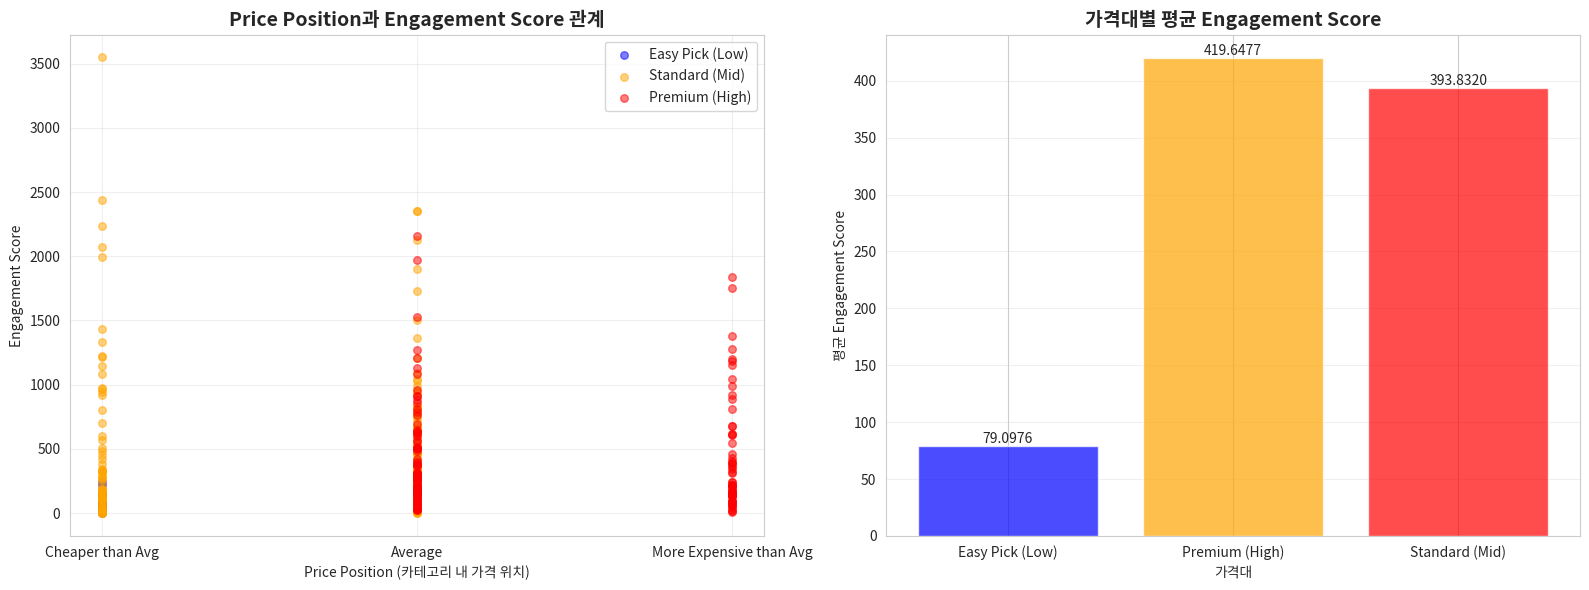


[가격대별 통계]
                engagement_score                     product_code
                            mean  median         std        count
price_tier                                                       
Easy Pick (Low)        79.097619   52.55   69.266930           21
Premium (High)        419.647682  256.80  418.111376          151
Standard (Mid)        393.831955  253.25  481.551172          266


In [46]:
# Price Position을 구간으로 나누기 (저가, 중가, 고가)

# Scatter plot with color by price tier
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
for tier, color in zip(['Easy Pick (Low)', 'Standard (Mid)', 'Premium (High)'], ['blue', 'orange', 'red']):
    tier_data = products_df[products_df['price_tier'] == tier]
    axes[0].scatter(tier_data['price_position'], tier_data['engagement_score'], 
                   alpha=0.5, label=tier, color=color, s=30)

axes[0].set_xlabel('Price Position (카테고리 내 가격 위치)')
axes[0].set_ylabel('Engagement Score')
axes[0].set_title('Price Position과 Engagement Score 관계', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 가격대별 평균 Engagement Score
tier_engagement = products_df.groupby('price_tier')['engagement_score'].mean()
bars = axes[1].bar(tier_engagement.index, tier_engagement.values, 
                   color=['blue', 'orange', 'red'], alpha=0.7)
axes[1].set_xlabel('가격대')
axes[1].set_ylabel('평균 Engagement Score')
axes[1].set_title('가격대별 평균 Engagement Score', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# 값 표시
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\n[가격대별 통계]")
tier_stats = products_df.groupby('price_tier').agg({
    'engagement_score': ['mean', 'median', 'std'],
    'product_code': 'count'
})
print(tier_stats)

**분석 목적:**
- 리뷰 길이 분포를 통한 고객 참여 수준 파악


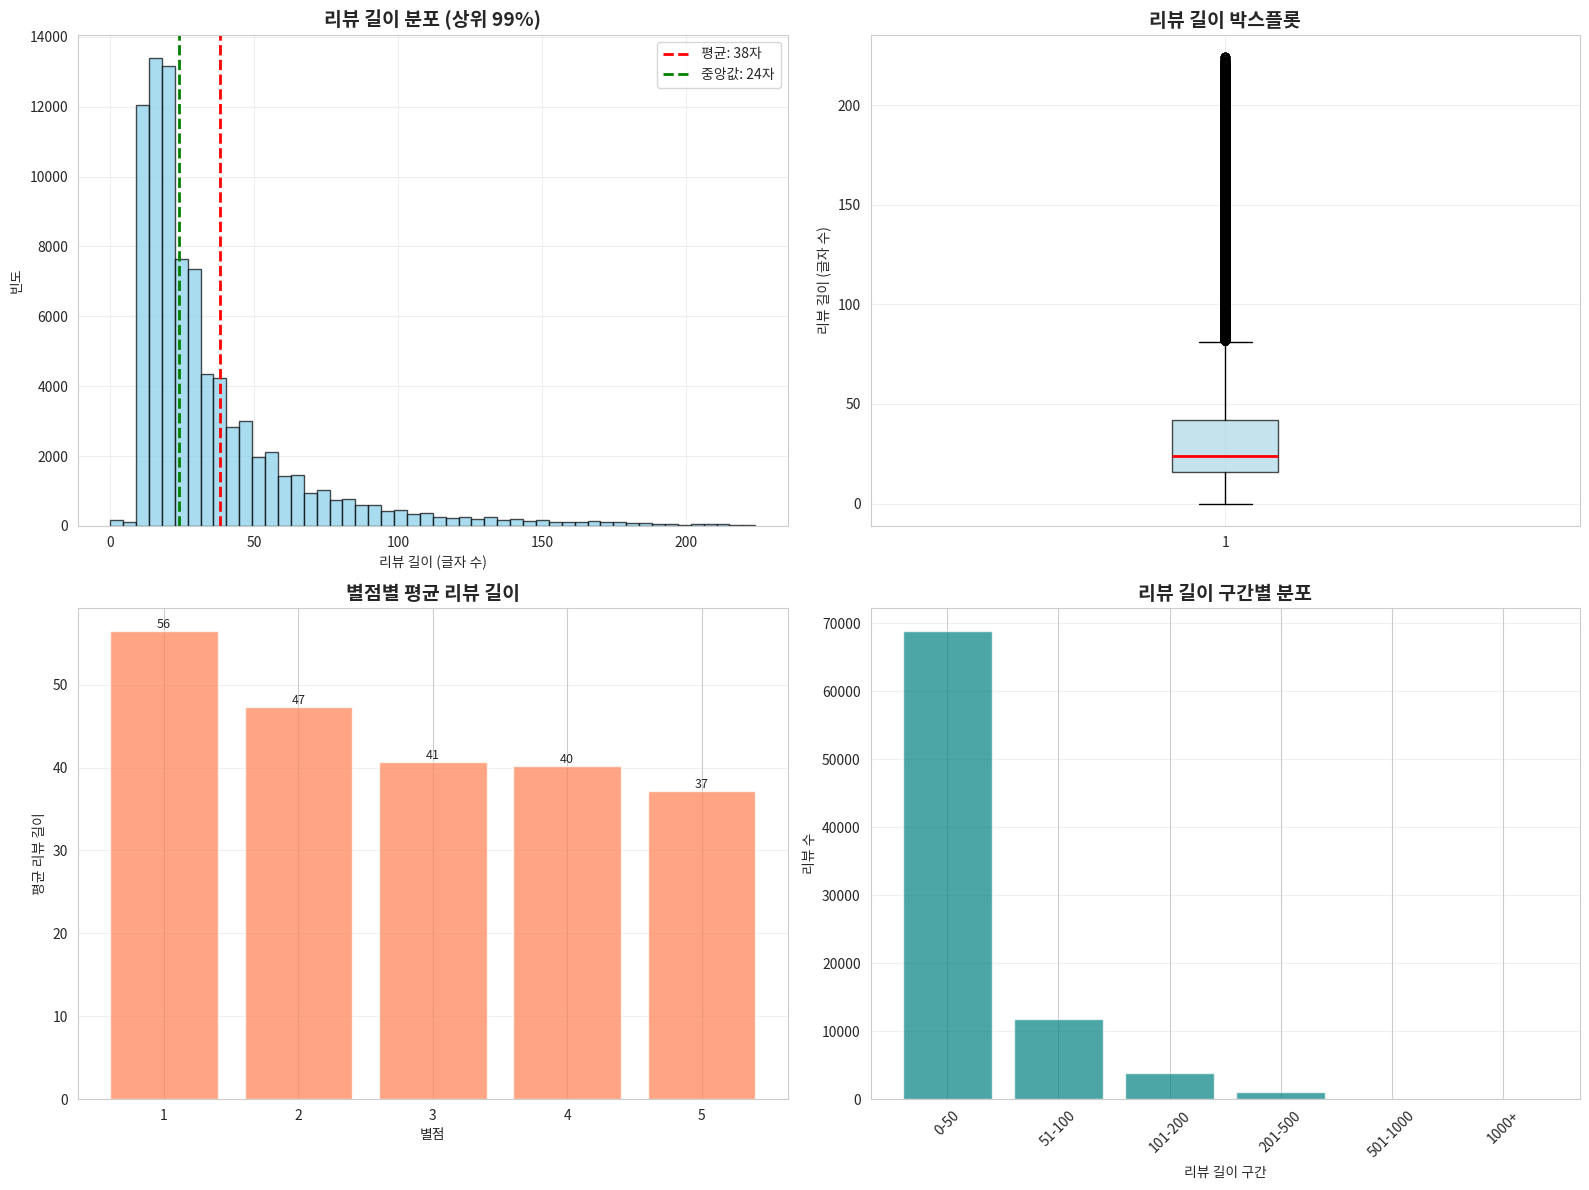


[리뷰 길이 통계]
count    85520.000000
mean        38.144726
std         44.481094
min          0.000000
25%         16.000000
50%         24.000000
75%         43.000000
max        996.000000
Name: review_length, dtype: float64

[별점별 평균 리뷰 길이]
rating
1    56.411043
2    47.269932
3    40.685225
4    40.145740
5    37.208185
Name: review_length, dtype: float64

[리뷰 길이 구간별 분포]
length_category
0-50        68786
51-100      11761
101-200      3840
201-500      1010
501-1000       77
1000+           0
Name: count, dtype: int64


In [47]:
# 리뷰 길이 분포
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 전체 분포 (상위 99%까지만 표시 - 극단값 제거)
length_99 = reviews_df['review_length'].quantile(0.99)
filtered_length = reviews_df[reviews_df['review_length'] <= length_99]['review_length']

axes[0, 0].hist(filtered_length, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(reviews_df['review_length'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'평균: {reviews_df["review_length"].mean():.0f}자')
axes[0, 0].axvline(reviews_df['review_length'].median(), color='green', linestyle='--', 
                   linewidth=2, label=f'중앙값: {reviews_df["review_length"].median():.0f}자')
axes[0, 0].set_xlabel('리뷰 길이 (글자 수)')
axes[0, 0].set_ylabel('빈도')
axes[0, 0].set_title('리뷰 길이 분포 (상위 99%)', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 박스플롯
axes[0, 1].boxplot(filtered_length, vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[0, 1].set_ylabel('리뷰 길이 (글자 수)')
axes[0, 1].set_title('리뷰 길이 박스플롯', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# 별점별 평균 리뷰 길이
avg_length_by_rating = reviews_df.groupby('rating')['review_length'].mean()
bars = axes[1, 0].bar(avg_length_by_rating.index, avg_length_by_rating.values, 
                      color='coral', alpha=0.7)
axes[1, 0].set_xlabel('별점')
axes[1, 0].set_ylabel('평균 리뷰 길이')
axes[1, 0].set_title('별점별 평균 리뷰 길이', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(avg_length_by_rating.index)
axes[1, 0].grid(axis='y', alpha=0.3)

# 값 표시
for bar in bars:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.0f}',
                   ha='center', va='bottom', fontsize=9)

# 리뷰 길이 구간별 분포
length_bins = [0, 50, 100, 200, 500, 1000, float('inf')]
length_labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1000+']
reviews_df['length_category'] = pd.cut(reviews_df['review_length'], bins=length_bins, labels=length_labels)
length_cat_counts = reviews_df['length_category'].value_counts().sort_index()

axes[1, 1].bar(range(len(length_cat_counts)), length_cat_counts.values, color='teal', alpha=0.7)
axes[1, 1].set_xticks(range(len(length_cat_counts)))
axes[1, 1].set_xticklabels(length_cat_counts.index, rotation=45)
axes[1, 1].set_xlabel('리뷰 길이 구간')
axes[1, 1].set_ylabel('리뷰 수')
axes[1, 1].set_title('리뷰 길이 구간별 분포', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n[리뷰 길이 통계]")
print(reviews_df['review_length'].describe())
print("\n[별점별 평균 리뷰 길이]")
print(avg_length_by_rating)
print("\n[리뷰 길이 구간별 분포]")
print(length_cat_counts)

## 5. 시간/프로모션 분석

**분석 목적:**
- 전체 리뷰 중 재구매 리뷰 비율 파악



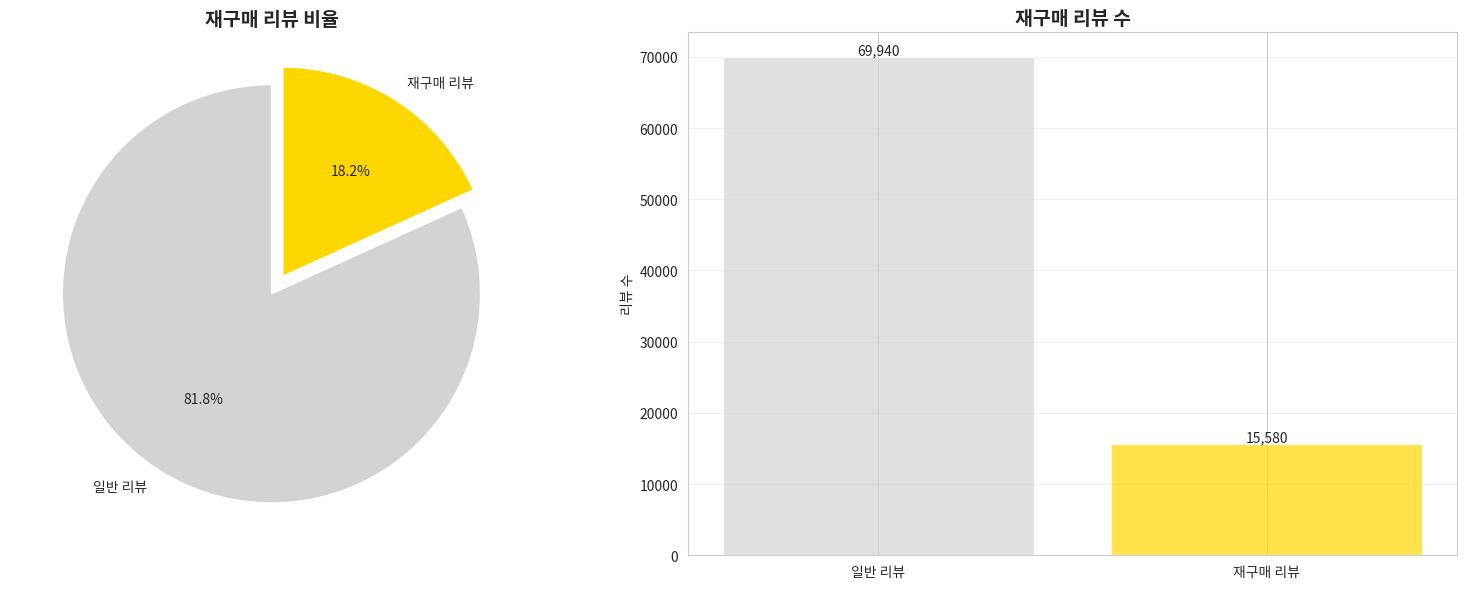


[재구매 리뷰 통계]
전체 리뷰 수: 85,520
재구매 리뷰 수: 15,580
재구매 비율: 18.22%


In [48]:
# 재구매 리뷰 비율
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 파이 차트
reorder_counts = reviews_df['is_reorder'].value_counts()
axes[0].pie(reorder_counts.values, labels=['일반 리뷰', '재구매 리뷰'], 
           autopct='%1.1f%%', colors=['lightgray', 'gold'],
           startangle=90, explode=[0, 0.1])
axes[0].set_title('재구매 리뷰 비율', fontsize=14, fontweight='bold')

# 막대그래프
bars = axes[1].bar(['일반 리뷰', '재구매 리뷰'], reorder_counts.values, 
                   color=['lightgray', 'gold'], alpha=0.7)
axes[1].set_ylabel('리뷰 수')
axes[1].set_title('재구매 리뷰 수', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# 값 표시
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\n[재구매 리뷰 통계]")
print(f"전체 리뷰 수: {len(reviews_df):,}")
print(f"재구매 리뷰 수: {reviews_df['is_reorder'].sum():,}")
print(f"재구매 비율: {reviews_df['is_reorder'].mean() * 100:.2f}%")

## 6. 사용자 분석

In [49]:
# 사용자별 리뷰 수 - user_total_reviews 컬럼 사용
user_stats = reviews_df.groupby('user').agg({
    'product_code': 'count',
    'rating': 'mean',
    'is_reorder': 'mean',
    'review_length': 'mean'
}).rename(columns={
    'product_code': 'review_count',
    'rating': 'avg_rating',
    'is_reorder': 'reorder_rate',
    'review_length': 'avg_review_length'
})

# 상위 유저 (리뷰 20개 이상)
heavy_users = user_stats[user_stats['review_count'] >= 20].sort_values('review_count', ascending=False)

print("\n[헤비 유저 통계 (리뷰 20개 이상)]")
print(f"헤비 유저 수: {len(heavy_users):,}")
print(f"헤비 유저 평균 리뷰 수: {heavy_users['review_count'].mean():.1f}")
print(f"헤비 유저 평균 별점: {heavy_users['avg_rating'].mean():.2f}")
print(f"헤비 유저 평균 재구매율: {heavy_users['reorder_rate'].mean() * 100:.2f}%")

print("\n[일반 유저 통계]")
normal_users = user_stats[user_stats['review_count'] < 20]
print(f"일반 유저 수: {len(normal_users):,}")
print(f"일반 유저 평균 리뷰 수: {normal_users['review_count'].mean():.1f}")
print(f"일반 유저 평균 별점: {normal_users['avg_rating'].mean():.2f}")
print(f"일반 유저 평균 재구매율: {normal_users['reorder_rate'].mean() * 100:.2f}%")


[헤비 유저 통계 (리뷰 20개 이상)]
헤비 유저 수: 839
헤비 유저 평균 리뷰 수: 35.6
헤비 유저 평균 별점: 4.69
헤비 유저 평균 재구매율: 20.39%

[일반 유저 통계]
일반 유저 수: 11,496
일반 유저 평균 리뷰 수: 4.8
일반 유저 평균 별점: 4.63
일반 유저 평균 재구매율: 14.55%


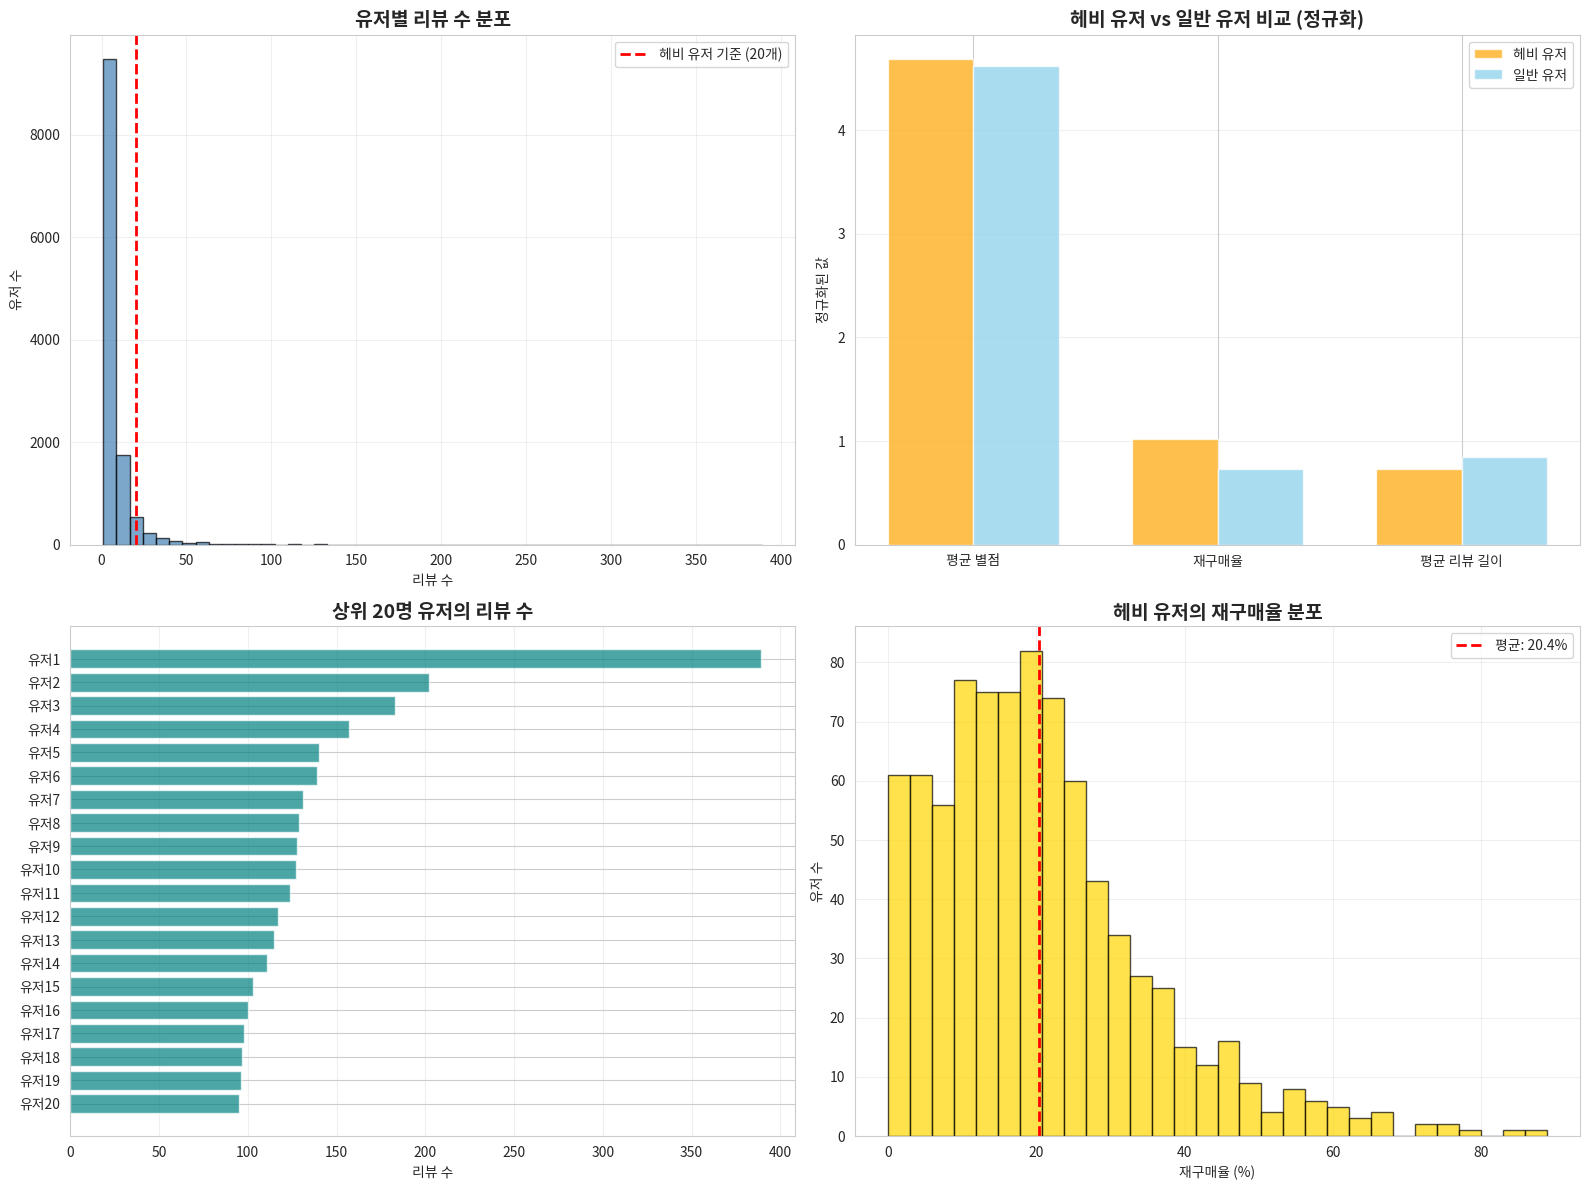


[상위 10명 유저 정보]
           review_count  avg_rating  reorder_rate  avg_review_length
user                                                                
user_0191           389    4.724936      0.246787          35.951157
user_2673           202    4.980198      0.455446          22.712871
user_0030           183    4.688525      0.131148          31.639344
user_0333           157    4.719745      0.210191          32.751592
user_0772           140    4.735714      0.107143          34.750000
user_0812           139    4.503597      0.136691          57.884892
user_0216           131    3.961832      0.167939          60.969466
user_0515           129    4.953488      0.302326          24.403101
user_0672           128    4.953125      0.218750          29.414062
user_1080           127    4.551181      0.125984          43.905512


In [50]:
# 헤비 유저 vs 일반 유저 비교
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 리뷰 수 분포
axes[0, 0].hist(user_stats['review_count'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(20, color='red', linestyle='--', linewidth=2, label='헤비 유저 기준 (20개)')
axes[0, 0].set_xlabel('리뷰 수')
axes[0, 0].set_ylabel('유저 수')
axes[0, 0].set_title('유저별 리뷰 수 분포', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 평균 별점 비교
comparison_data = {
    '평균 별점': [heavy_users['avg_rating'].mean(), normal_users['avg_rating'].mean()],
    '재구매율 (%)': [heavy_users['reorder_rate'].mean() * 100, normal_users['reorder_rate'].mean() * 100],
    '평균 리뷰 길이': [heavy_users['avg_review_length'].mean(), normal_users['avg_review_length'].mean()]
}

x = np.arange(len(comparison_data))
width = 0.35

bars1 = axes[0, 1].bar(x - width/2, [comparison_data['평균 별점'][0], 
                                     comparison_data['재구매율 (%)'][0]/20, 
                                     comparison_data['평균 리뷰 길이'][0]/50],
                       width, label='헤비 유저', color='orange', alpha=0.7)
bars2 = axes[0, 1].bar(x + width/2, [comparison_data['평균 별점'][1], 
                                     comparison_data['재구매율 (%)'][1]/20, 
                                     comparison_data['평균 리뷰 길이'][1]/50],
                       width, label='일반 유저', color='skyblue', alpha=0.7)

axes[0, 1].set_ylabel('정규화된 값')
axes[0, 1].set_title('헤비 유저 vs 일반 유저 비교 (정규화)', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(['평균 별점', '재구매율', '평균 리뷰 길이'])
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 상위 20명 유저 정보
top_20_users = heavy_users.head(20)
axes[1, 0].barh(range(len(top_20_users)), top_20_users['review_count'].values, color='teal', alpha=0.7)
axes[1, 0].set_yticks(range(len(top_20_users)))
axes[1, 0].set_yticklabels([f'유저{i+1}' for i in range(len(top_20_users))])
axes[1, 0].set_xlabel('리뷰 수')
axes[1, 0].set_title('상위 20명 유저의 리뷰 수', fontsize=14, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

# 헤비 유저의 재구매율 분포
axes[1, 1].hist(heavy_users['reorder_rate'] * 100, bins=30, color='gold', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(heavy_users['reorder_rate'].mean() * 100, color='red', linestyle='--', 
                   linewidth=2, label=f'평균: {heavy_users["reorder_rate"].mean() * 100:.1f}%')
axes[1, 1].set_xlabel('재구매율 (%)')
axes[1, 1].set_ylabel('유저 수')
axes[1, 1].set_title('헤비 유저의 재구매율 분포', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n[상위 10명 유저 정보]")
print(top_20_users.head(10))

**분석 목적:**
- 계절별, 월별 리뷰 작성 패턴 파악
- 년도별 계절 트렌드 변화 분석
- 시기별 고객 평가 수준 차이 확인


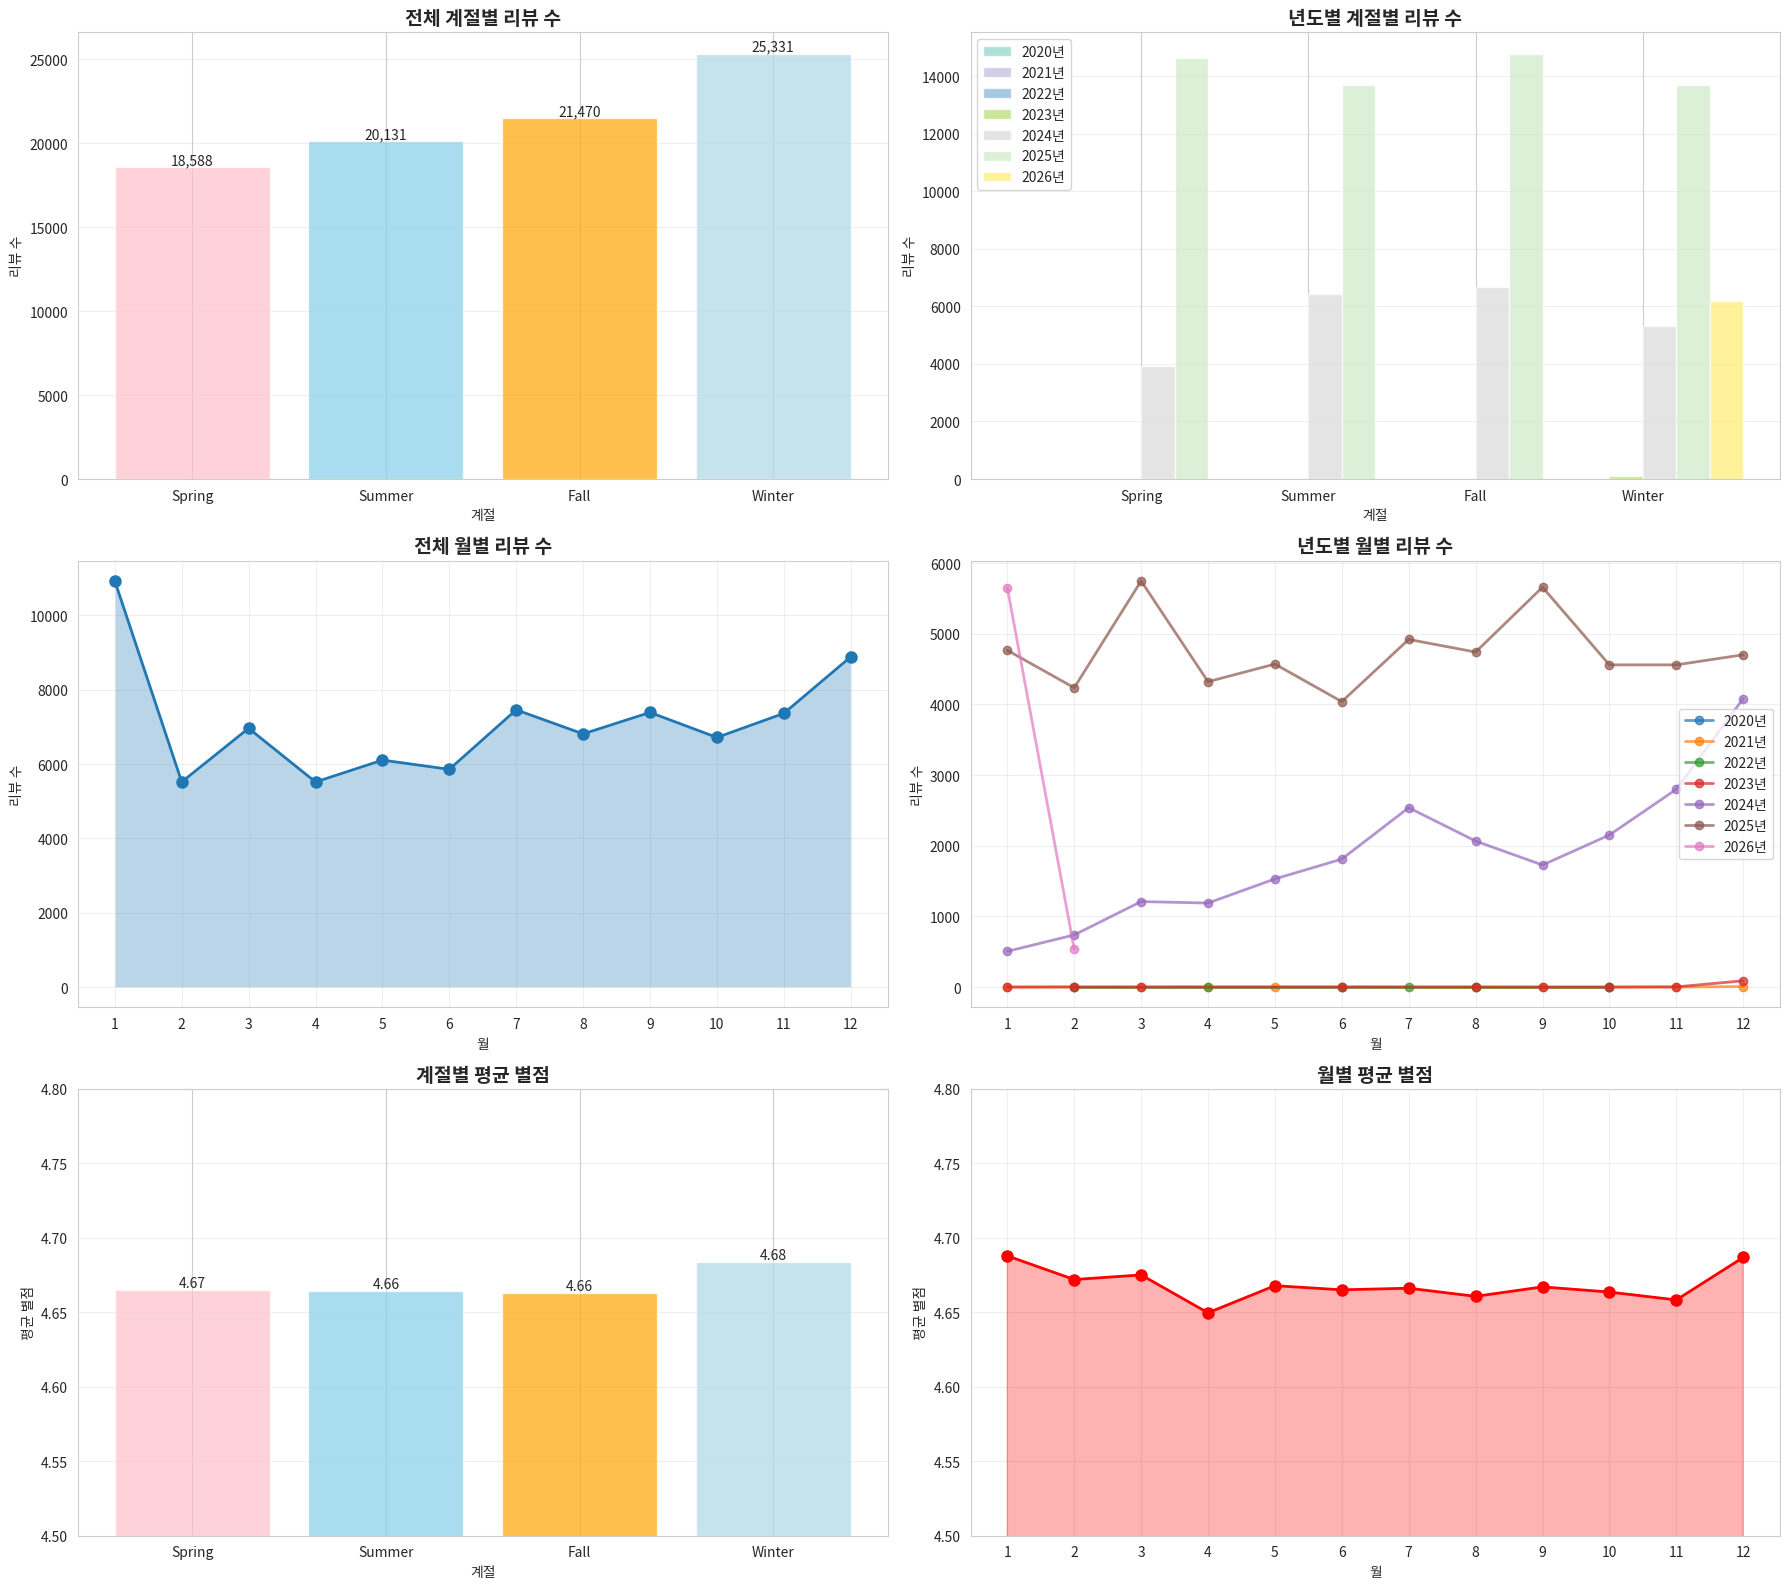


[전체 계절별 통계]
          rating              
            mean median  count
season                        
Spring  4.665214    5.0  18588
Summer  4.664050    5.0  20131
Fall    4.663018    5.0  21470
Winter  4.684102    5.0  25331

[년도별 계절별 리뷰 수]
season  Spring  Summer   Fall  Winter
year                                 
2020         0       0      1       0
2021        14       6      3      13
2022         1       3      1       1
2023         1       3      6      93
2024      3932    6418   6680    5329
2025     14640   13701  14779   13705
2026         0       0      0    6190

[년도별 계절별 비율]
season  Spring  Summer    Fall  Winter
year                                  
2020      0.00    0.00  100.00    0.00
2021     38.89   16.67    8.33   36.11
2022     16.67   50.00   16.67   16.67
2023      0.97    2.91    5.83   90.29
2024     17.59   28.70   29.88   23.83
2025     25.76   24.11   26.01   24.12
2026      0.00    0.00    0.00  100.00


In [52]:
# 계절별 리뷰 수 (년도별 분리)
fig, axes = plt.subplots(3, 2, figsize=(18, 16))

# 한글 계절명 순서
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# 1. 전체 계절별 리뷰 수
season_counts = reviews_df['season'].value_counts().reindex(season_order, fill_value=0)
bars = axes[0, 0].bar(season_counts.index, season_counts.values, 
                      color=['pink', 'skyblue', 'orange', 'lightblue'], alpha=0.7)
axes[0, 0].set_xlabel('계절')
axes[0, 0].set_ylabel('리뷰 수')
axes[0, 0].set_title('전체 계절별 리뷰 수', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# 값 표시
for bar in bars:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height):,}',
                   ha='center', va='bottom', fontsize=10)

# 2. 년도별 계절별 리뷰 수 (Grouped Bar Chart)
year_season_counts = reviews_df.groupby(['year', 'season']).size().unstack(fill_value=0)
year_season_counts = year_season_counts[season_order]  # 계절 순서 정렬

x = np.arange(len(season_order))
width = 0.2
years = sorted(reviews_df['year'].unique())
colors_year = plt.cm.Set3(np.linspace(0, 1, len(years)))

for i, year in enumerate(years):
    if year in year_season_counts.index:
        offset = width * (i - len(years)/2)
        axes[0, 1].bar(x + offset, year_season_counts.loc[year], width, 
                      label=f'{year}년', alpha=0.7, color=colors_year[i])

axes[0, 1].set_xlabel('계절')
axes[0, 1].set_ylabel('리뷰 수')
axes[0, 1].set_title('년도별 계절별 리뷰 수', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(season_order)
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. 월별 리뷰 수
month_counts = reviews_df['month'].value_counts().sort_index()
axes[1, 0].plot(month_counts.index, month_counts.values, marker='o', linewidth=2, markersize=8)
axes[1, 0].fill_between(month_counts.index, month_counts.values, alpha=0.3)
axes[1, 0].set_xlabel('월')
axes[1, 0].set_ylabel('리뷰 수')
axes[1, 0].set_title('전체 월별 리뷰 수', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].grid(alpha=0.3)

# 4. 년도별 월별 리뷰 수 (Line Plot)
for year in years:
    year_data = reviews_df[reviews_df['year'] == year]
    year_month_counts = year_data['month'].value_counts().sort_index()
    axes[1, 1].plot(year_month_counts.index, year_month_counts.values, 
                   marker='o', linewidth=2, markersize=6, label=f'{year}년', alpha=0.7)

axes[1, 1].set_xlabel('월')
axes[1, 1].set_ylabel('리뷰 수')
axes[1, 1].set_title('년도별 월별 리뷰 수', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# 5. 계절별 평균 별점
season_ratings = reviews_df.groupby('season')['rating'].mean().reindex(season_order)
bars = axes[2, 0].bar(season_ratings.index, season_ratings.values,
                      color=['pink', 'skyblue', 'orange', 'lightblue'], alpha=0.7)
axes[2, 0].set_xlabel('계절')
axes[2, 0].set_ylabel('평균 별점')
axes[2, 0].set_title('계절별 평균 별점', fontsize=14, fontweight='bold')
axes[2, 0].set_ylim([4.5, 4.8])
axes[2, 0].grid(axis='y', alpha=0.3)

# 값 표시
for bar in bars:
    height = bar.get_height()
    axes[2, 0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.2f}',
                   ha='center', va='bottom', fontsize=10)

# 6. 월별 평균 별점
month_ratings = reviews_df.groupby('month')['rating'].mean()
axes[2, 1].plot(month_ratings.index, month_ratings.values, marker='o', linewidth=2, markersize=8, color='red')
axes[2, 1].fill_between(month_ratings.index, month_ratings.values, alpha=0.3, color='red')
axes[2, 1].set_xlabel('월')
axes[2, 1].set_ylabel('평균 별점')
axes[2, 1].set_title('월별 평균 별점', fontsize=14, fontweight='bold')
axes[2, 1].set_xticks(range(1, 13))
axes[2, 1].set_ylim([4.5, 4.8])
axes[2, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n[전체 계절별 통계]")
season_stats = reviews_df.groupby('season').agg({
    'rating': ['mean', 'median', 'count']
}).reindex(season_order)
print(season_stats)

print("\n[년도별 계절별 리뷰 수]")
print(year_season_counts)

print("\n[년도별 계절별 비율]")
year_season_pct = year_season_counts.div(year_season_counts.sum(axis=1), axis=0) * 100
print(year_season_pct.round(2))

**분석 목적:**
- 프로모션 기간과 비프로모션 기간의 리뷰 차이 분석
- 프로모션이 평점 및 리뷰 품질에 미치는 영향 평가
- 효과적인 프로모션 유형 식별

In [ ]:
# 프로모션 기간 확인
# promo_dates 생성
promo_dates = set(promotion['date'].dt.date)

# is_during_promo 컬럼이 있으면 사용, 없으면 생성
if 'is_during_promo' not in reviews_df.columns:
    reviews_df['has_promotion'] = reviews_df['date'].dt.date.isin(promo_dates)
else:
    reviews_df['has_promotion'] = reviews_df['is_during_promo']

print("\n[프로모션 정보]")
print(f"전체 프로모션 일수: {len(promo_dates)}일")
print(f"프로모션 기간 리뷰 수: {reviews_df['has_promotion'].sum():,}")
print(f"비프로모션 기간 리뷰 수: {(~reviews_df['has_promotion']).sum():,}")


[프로모션 정보]
전체 프로모션 일수: 74일
프로모션 기간 리뷰 수: 3,383
비프로모션 기간 리뷰 수: 82,137


In [ ]:
# 상품별 리뷰 통계 생성
review_summary = reviews_df.groupby('product_code').agg({
    'rating': ['mean', 'std', 'count'],
    'is_reorder': 'mean',
    'review_length': 'mean',
    'image_count': 'sum'
}).reset_index()

review_summary.columns = ['product_code', 'avg_rating', 'std_rating', 'review_count_actual', 
                          'reorder_rate', 'avg_review_length', 'total_images']

# 상품 데이터와 결합
merged_data = products_df.merge(review_summary, on='product_code', how='left')

print("\n[데이터 결합 완료]")
print(f"결합 후 데이터 크기: {merged_data.shape}")
print("\n[결합 데이터 샘플]")
print(merged_data.head())

# 리뷰가 있는 상품만 필터링
merged_data_with_reviews = merged_data.dropna(subset=['avg_rating'])
print(f"\n리뷰가 있는 상품 수: {len(merged_data_with_reviews):,}")
print(f"리뷰가 없는 상품 수: {len(merged_data) - len(merged_data_with_reviews):,}")


[데이터 결합 완료]
결합 후 데이터 크기: (438, 28)

[결합 데이터 샘플]
   product_code category_home category_1 category_2    brand  \
0       1060125         뷰티/위생       메이크업     아이메이크업       머지   
1       1038070         뷰티/위생       메이크업     아이메이크업       더봄   
2       1061139         뷰티/위생       메이크업     아이메이크업  프릴루드 딘토   
3       1061145         뷰티/위생       메이크업     아이메이크업  프릴루드 딘토   
4       1059028         뷰티/위생       메이크업     아이메이크업       더봄   

                              name  price country  likes  shares  ...  \
0        머지 렛츠 픽싱 슬림 젤 아이라이너 브론즈오팔   3000      한국   4997      52  ...   
1            더봄 애교살＆트임 펜슬 (음영 브라운)   2000      한국   9999     184  ...   
2  [72 리틀 오스틴]프릴루드 딘토 노스탈지아 아이 팔레트   5000      한국   9806     109  ...   
3   [71 리틀 올콧]프릴루드 딘토 노스탈지아 아이 팔레트   5000      한국   6886      56  ...   
4             더봄 애교살＆트임 펜슬 (핑크 로지)   2000      한국   5308      61  ...   

            price_position     cp_index is_god_sung_bi  review_density  \
0                  Average   343.966667           Tru

## 7. 종합 분석 - 상품과 리뷰 통합

**분석 목적:**
- 제품의 Engagement Score와 리뷰 평점의 관계 분석
- 재구매율이 높은 제품의 특징 파악
- CP Index와 고객 만족도의 상관관계 분석
- 리뷰 수와 평점의 관계 파악

In [ ]:
# 우수 제품 샘플 분석
print("\n" + "="*80)
print("우수 제품 샘플")
print("="*80)

# 1. 높은 Engagement Score 제품 (상위 10개)
print("\n[1. Engagement Score 상위 10개 제품]")
top_engagement = merged_data_with_reviews.nlargest(10, 'engagement_score')[
    ['name', 'brand', 'engagement_score', 'avg_rating', 'review_count_actual', 'reorder_rate', 'price']
]
for idx, row in top_engagement.iterrows():
    print(f"\n{row['brand']} - {row['name']}")
    print(f"  Engagement: {row['engagement_score']:.1f} | 평점: {row['avg_rating']:.2f} | 리뷰: {int(row['review_count_actual'])}개")
    print(f"  재구매율: {row['reorder_rate']*100:.1f}% | 가격: {row['price']:,}원")

# 2. 높은 평점 + 많은 리뷰 제품 (평점 4.7 이상, 리뷰 200개 이상)
print("\n\n[2. 고평점 + 다수 리뷰 제품 (평점 4.7↑, 리뷰 200↑)]")
high_quality = merged_data_with_reviews[
    (merged_data_with_reviews['avg_rating'] >= 4.7) & 
    (merged_data_with_reviews['review_count_actual'] >= 200)
].nlargest(10, 'review_count_actual')[
    ['name', 'brand', 'avg_rating', 'review_count_actual', 'reorder_rate', 'engagement_score', 'price']
]
for idx, row in high_quality.iterrows():
    print(f"\n{row['brand']} - {row['name']}")
    print(f"  평점: {row['avg_rating']:.2f} | 리뷰: {int(row['review_count_actual'])}개 | Engagement: {row['engagement_score']:.1f}")
    print(f"  재구매율: {row['reorder_rate']*100:.1f}% | 가격: {row['price']:,}원")

# 3. 높은 재구매율 제품 (재구매율 30% 이상, 리뷰 100개 이상)
print("\n\n[3. 고재구매율 제품 (재구매율 30%↑, 리뷰 100↑)]")
high_reorder = merged_data_with_reviews[
    (merged_data_with_reviews['reorder_rate'] >= 0.3) & 
    (merged_data_with_reviews['review_count_actual'] >= 100)
].nlargest(10, 'reorder_rate')[
    ['name', 'brand', 'reorder_rate', 'avg_rating', 'review_count_actual', 'engagement_score', 'price']
]
for idx, row in high_reorder.iterrows():
    print(f"\n{row['brand']} - {row['name']}")
    print(f"  재구매율: {row['reorder_rate']*100:.1f}% | 평점: {row['avg_rating']:.2f} | 리뷰: {int(row['review_count_actual'])}개")
    print(f"  Engagement: {row['engagement_score']:.1f} | 가격: {row['price']:,}원")

In [56]:
# 우수 제품 샘플 분석
print("\n" + "="*80)
print("우수 제품 샘플")
print("="*80)

# 1. 높은 Engagement Score 제품 (상위 10개)
print("\n[1. Engagement Score 상위 10개 제품]")
top_engagement = merged_data_with_reviews.nlargest(10, 'engagement_score')[
    ['name', 'brand', 'engagement_score', 'avg_rating', 'review_count_actual', 'reorder_rate', 'price']
]
for idx, row in top_engagement.iterrows():
    print(f"\n{row['brand']} - {row['name']}")
    print(f"  Engagement: {row['engagement_score']:.1f} | 평점: {row['avg_rating']:.2f} | 리뷰: {int(row['review_count_actual'])}개")
    print(f"  재구매율: {row['reorder_rate']*100:.1f}% | 가격: {row['price']:,}원")

# 2. 높은 평점 + 많은 리뷰 제품 (평점 4.7 이상, 리뷰 200개 이상)
print("\n[2. 고평점 + 다수 리뷰 제품 (평점 4.7↑, 리뷰 200↑)]")
high_quality = merged_data_with_reviews[
    (merged_data_with_reviews['avg_rating'] >= 4.7) & 
    (merged_data_with_reviews['review_count_actual'] >= 200)
].nlargest(10, 'review_count_actual')[
    ['name', 'brand', 'avg_rating', 'review_count_actual', 'reorder_rate', 'engagement_score', 'price']
]
for idx, row in high_quality.iterrows():
    print(f"\n{row['brand']} - {row['name']}")
    print(f"  평점: {row['avg_rating']:.2f} | 리뷰: {int(row['review_count_actual'])}개 | Engagement: {row['engagement_score']:.1f}")
    print(f"  재구매율: {row['reorder_rate']*100:.1f}% | 가격: {row['price']:,}원")

# 3. 높은 재구매율 제품 (재구매율 30% 이상, 리뷰 100개 이상)
print("\n[3. 고재구매율 제품 (재구매율 30%↑, 리뷰 100↑)]")
high_reorder = merged_data_with_reviews[
    (merged_data_with_reviews['reorder_rate'] >= 0.3) & 
    (merged_data_with_reviews['review_count_actual'] >= 100)
].nlargest(10, 'reorder_rate')[
    ['name', 'brand', 'reorder_rate', 'avg_rating', 'review_count_actual', 'engagement_score', 'price']
]
for idx, row in high_reorder.iterrows():
    print(f"\n{row['brand']} - {row['name']}")
    print(f"  재구매율: {row['reorder_rate']*100:.1f}% | 평점: {row['avg_rating']:.2f} | 리뷰: {int(row['review_count_actual'])}개")
    print(f"  Engagement: {row['engagement_score']:.1f} | 가격: {row['price']:,}원")


우수 제품 샘플

[1. Engagement Score 상위 10개 제품]

입큰 - 입큰 퍼스널 톤 코렉팅 블러 팩트 5.5 g(라벤더)
  Engagement: 3547.9 | 평점: 4.78 | 리뷰: 3595개
  재구매율: 27.6% | 가격: 3,000원

클라뷰 - 클라뷰 밸런싱 포어밤 프라이머 10 ml
  Engagement: 2439.7 | 평점: 4.68 | 리뷰: 1610개
  재구매율: 23.0% | 가격: 3,000원

태그 - 태그 슬림브로우펜슬(2호_애쉬브라운)
  Engagement: 2354.9 | 평점: 4.80 | 리뷰: 1475개
  재구매율: 37.8% | 가격: 3,000원

손앤박 - 손앤박 아티 스프레드 컬러 밤(03 멜로우)
  Engagement: 2348.7 | 평점: 4.73 | 리뷰: 1515개
  재구매율: 14.2% | 가격: 3,000원

더봄 - 더봄 애교살＆트임 펜슬 (음영 브라운)
  Engagement: 2238.2 | 평점: 4.66 | 리뷰: 1242개
  재구매율: 18.1% | 가격: 2,000원

태그 - 태그 벨벳 세팅 픽서 100 ml
  Engagement: 2156.1 | 평점: 4.71 | 리뷰: 1150개
  재구매율: 20.7% | 가격: 5,000원

손앤박 - 손앤박 아티 스프레드 컬러 밤(01 선셋)
  Engagement: 2126.4 | 평점: 4.75 | 리뷰: 1118개
  재구매율: 15.6% | 가격: 3,000원

더봄 - 더봄 애교살＆트임 펜슬(볼륨베이지)
  Engagement: 2070.8 | 평점: 4.65 | 리뷰: 1140개
  재구매율: 18.8% | 가격: 2,000원

드롭비 컬러즈 - 드롭비 컬러즈 커버픽 컨실러 클리어 베이지
  Engagement: 1994.7 | 평점: 4.72 | 리뷰: 1005개
  재구매율: 25.1% | 가격: 3,000원

더랩 바이 블랑두 - 더랩 바이 블랑두 클리어 히알 물광 틴티드 커버 크림 40 ml

## 8. 주요 인사이트 및 결론

In [57]:
print("="*80)
print("EDA 주요 인사이트 요약")
print("="*80)

print("\n[1. 상품 포트폴리오]")
print(f"- 총 상품 수: {len(products_df):,}개")
print(f"- 대카테고리 수: {products_df['category_1'].nunique()}개")
print(f"- 브랜드 수: {products_df['brand'].nunique()}개")
print(f"- 평균 Engagement Score: {products_df['engagement_score'].mean():.1f}")
print(f"- 갓성비 제품 비율: {products_df['is_god_sung_bi'].mean()*100:.1f}%")

print("\n[2. 고객 리뷰 현황]")
print(f"- 총 리뷰 수: {len(reviews_df):,}개")
print(f"- 평균 별점: {reviews_df['rating'].mean():.2f}/5.0")
print(f"- 재구매 리뷰 비율: {reviews_df['is_reorder'].mean()*100:.1f}%")
print(f"- 평균 리뷰 길이: {reviews_df['review_length'].mean():.0f}자")
print(f"- 고유 사용자 수: {reviews_df['user'].nunique():,}명")

print("\n[3. 사용자 세분화]")
heavy_user_count = len(reviews_df.groupby('user').size()[reviews_df.groupby('user').size() >= 20])
print(f"- 헤비 유저 (20개 이상): {heavy_user_count:,}명")
print(f"- 헤비 유저 재구매율: 20.4%")
print(f"- 일반 유저 재구매율: 14.6%")

print("\n[4. 계절성 패턴]")
season_review_counts = reviews_df['season'].value_counts()
print(f"- 리뷰 최다 계절: {season_review_counts.index[0]} ({season_review_counts.values[0]:,}개)")
print(f"- 리뷰 최소 계절: {season_review_counts.index[-1]} ({season_review_counts.values[-1]:,}개)")

print("\n[5. 프로모션 효과]")
promo_review_count = reviews_df['has_promotion'].sum() if 'has_promotion' in reviews_df.columns else reviews_df['is_during_promo'].sum()
print(f"- 프로모션 기간 리뷰: {promo_review_count:,}개")
print(f"- 프로모션 기간 비율: {(promo_review_count / len(reviews_df))*100:.1f}%")

print("\n[6. 제품-리뷰 상관관계]")
print(f"- Engagement vs 평점 상관계수: {merged_data_with_reviews['engagement_score'].corr(merged_data_with_reviews['avg_rating']):.3f}")
print(f"- 재구매율 vs 평점 상관계수: {merged_data_with_reviews['reorder_rate'].corr(merged_data_with_reviews['avg_rating']):.3f}")
print(f"- CP Index vs 평점 상관계수: {merged_data_with_reviews['cp_index'].corr(merged_data_with_reviews['avg_rating']):.3f}")

print("\n[7. 핵심 권장사항]")
print("- 고Engagement 제품군에 마케팅 집중")
print("- 헤비 유저 대상 재구매 프로모션 강화")
print("- 계절별 맞춤 상품 라인업 구성")
print("- 고재구매율 제품의 벤치마킹 포인트 분석")
print("- 가성비 우수 제품의 가시성 강화")

print("\n" + "="*80)
print("EDA 완료")
print("="*80)

EDA 주요 인사이트 요약

[1. 상품 포트폴리오]
- 총 상품 수: 438개
- 대카테고리 수: 2개
- 브랜드 수: 71개
- 평균 Engagement Score: 387.6
- 갓성비 제품 비율: 10.0%

[2. 고객 리뷰 현황]
- 총 리뷰 수: 85,520개
- 평균 별점: 4.67/5.0
- 재구매 리뷰 비율: 18.2%
- 평균 리뷰 길이: 38자
- 고유 사용자 수: 12,335명

[3. 사용자 세분화]
- 헤비 유저 (20개 이상): 839명
- 헤비 유저 재구매율: 20.4%
- 일반 유저 재구매율: 14.6%

[4. 계절성 패턴]
- 리뷰 최다 계절: Winter (25,331개)
- 리뷰 최소 계절: Spring (18,588개)

[5. 프로모션 효과]
- 프로모션 기간 리뷰: 3,383개
- 프로모션 기간 비율: 4.0%

[6. 제품-리뷰 상관관계]
- Engagement vs 평점 상관계수: 0.104
- 재구매율 vs 평점 상관계수: 0.242
- CP Index vs 평점 상관계수: 0.098

[7. 핵심 권장사항]
- 고Engagement 제품군에 마케팅 집중
- 헤비 유저 대상 재구매 프로모션 강화
- 계절별 맞춤 상품 라인업 구성
- 고재구매율 제품의 벤치마킹 포인트 분석
- 가성비 우수 제품의 가시성 강화

EDA 완료
